<a href="https://colab.research.google.com/github/algoexpert2468/bulldozer-price-prediction-with-time-variant/blob/main/bulldozer_price_prediction_with_time_variant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/MyDrive/TrainAndValid.csv')

Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [25]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

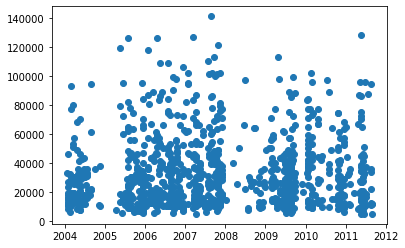

In [27]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

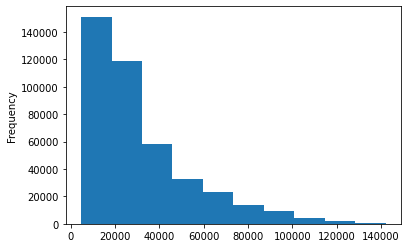

In [28]:
df.SalePrice.plot.hist()

In [30]:
df=pd.read_csv("/content/gdrive/MyDrive/TrainAndValid.csv",
               parse_dates=["saledate"])
df.saledate

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [31]:
df.saledate.dtype

dtype('<M8[ns]')

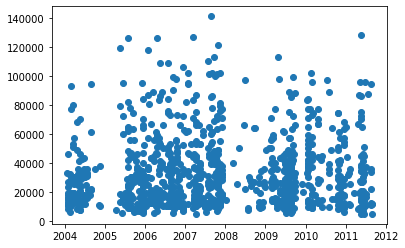

In [33]:
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [34]:
df.head()

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246    66000.0     999089     3157         121           3.0      2004   
1  1139248    57000.0     117657       77         121           3.0      1996   
2  1139249    10000.0     434808     7009         121           3.0      2001   
3  1139251    38500.0    1026470      332         121           3.0      2001   
4  1139253    11000.0    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter UsageBand   saledate  ... Undercarriage_Pad_Width  \
0                      68.0       Low 2006-11-16  ...                     NaN   
1                    4640.0       Low 2004-03-26  ...                     NaN   
2                    2838.0      High 2004-02-26  ...                     NaN   
3                    3486.0      High 2011-05-19  ...                     NaN   
4                     722.0    Medium 2009-07-23  ...                     NaN   

  Stick_Length Thumb Pattern_Changer Grouser_Type Backhoe_Mounting Blade_Type  \
0          NaN   NaN             NaN          NaN              NaN        NaN   
1          NaN   NaN             NaN          NaN              NaN        NaN   
2          NaN   NaN             NaN          NaN              NaN        NaN   
3          NaN   NaN             NaN          NaN              NaN        NaN   
4          NaN   NaN             NaN          NaN              NaN        NaN   

  Travel_Controls Differential_Type Steering_Controls  
0             NaN          Standard      Conventional  
1             NaN          Standard      Conventional  
2             NaN               NaN               NaN  
3             NaN               NaN               NaN  
4             NaN               NaN               NaN  

[5 rows x 53 columns]

In [35]:
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head()

In [36]:
df.T

205615  \
SalesID                                                             1646770   
SalePrice                                                            9500.0   
MachineID                                                           1126363   
ModelID                                                                8434   
datasource                                                              132   
auctioneerID                                                           18.0   
YearMade                                                               1974   
MachineHoursCurrentMeter                                                NaN   
UsageBand                                                               NaN   
saledate                                                1989-01-17 00:00:00   
fiModelDesc                                                            TD20   
fiBaseModel                                                            TD20   
fiSecondaryDesc                                                         NaN   
fiModelSeries                                                           NaN   
fiModelDescriptor                                                       NaN   
ProductSize                                                          Medium   
fiProductClassDesc        Track Type Tractor, Dozer - 105.0 to 130.0 Hor...   
state                                                                 Texas   
ProductGroup                                                            TTT   
ProductGroupDesc                                        Track Type Tractors   
Drive_System                                                            NaN   
Enclosure                                                             OROPS   
Forks                                                                   NaN   
Pad_Type                                                                NaN   
Ride_Control                                                            NaN   
Stick                                                                   NaN   
Transmission                                                   Direct Drive   
Turbocharged                                                            NaN   
Blade_Extension                                                         NaN   
Blade_Width                                                             NaN   
Enclosure_Type                                                          NaN   
Engine_Horsepower                                                       NaN   
Hydraulics                                                          2 Valve   
Pushblock                                                               NaN   
Ripper                                                  None or Unspecified   
Scarifier                                                               NaN   
Tip_Control                                                             NaN   
Tire_Size                                                               NaN   
Coupler                                                                 NaN   
Coupler_System                                                          NaN   
Grouser_Tracks                                                          NaN   
Hydraulics_Flow                                                         NaN   
Track_Type                                                              NaN   
Undercarriage_Pad_Width                                                 NaN   
Stick_Length                                                            NaN   
Thumb                                                                   NaN   
Pattern_Changer                                                         NaN   
Grouser_Type                                                            NaN   
Backhoe_Mounting                                        None or Unspecified   
Blade_Type                                                         Straight   
Travel_Controls                         

In [37]:
df_tmp=df.copy()

In [38]:
df_tmp.head(5)

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
205615  1646770     9500.0    1126363     8434         132          18.0   
274835  1821514    14000.0    1194089    10150         132          99.0   
141296  1505138    50000.0    1473654     4139         132          99.0   
212552  1671174    16000.0    1327630     8591         132          99.0   
62755   1329056    22000.0    1336053     4089         132          99.0   

        YearMade  MachineHoursCurrentMeter UsageBand   saledate  ...  \
205615      1974                       NaN       NaN 1989-01-17  ...   
274835      1980                       NaN       NaN 1989-01-31  ...   
141296      1978                       NaN       NaN 1989-01-31  ...   
212552      1980                       NaN       NaN 1989-01-31  ...   
62755       1984                       NaN       NaN 1989-01-31  ...   

       Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer  \
205615                     NaN          NaN   NaN             NaN   
274835                     NaN          NaN   NaN             NaN   
141296                     NaN          NaN   NaN             NaN   
212552                     NaN          NaN   NaN             NaN   
62755                      NaN          NaN   NaN             NaN   

       Grouser_Type     Backhoe_Mounting Blade_Type      Travel_Controls  \
205615          NaN  None or Unspecified   Straight  None or Unspecified   
274835          NaN                  NaN        NaN                  NaN   
141296          NaN  None or Unspecified   Straight  None or Unspecified   
212552          NaN                  NaN        NaN                  NaN   
62755           NaN  None or Unspecified        PAT                Lever   

       Differential_Type Steering_Controls  
205615               NaN               NaN  
274835          Standard      Conventional  
141296               NaN               NaN  
212552          Standard      Conventional  
62755                NaN               NaN  

[5 rows x 53 columns]

In [39]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayofweek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayofyear"] = df_tmp.saledate.dt.dayofyear

In [40]:
df_tmp.drop("saledate",axis=1,inplace=True)

In [41]:
df_tmp.T.head()

205615   274835   141296   212552   62755    54653    81383   \
SalesID     1646770  1821514  1505138  1671174  1329056  1301884  1379228   
SalePrice    9500.0  14000.0  50000.0  16000.0  22000.0  23500.0  31000.0   
MachineID   1126363  1194089  1473654  1327630  1336053  1182999  1082797   
ModelID        8434    10150     4139     8591     4089     4123     7620   
datasource      132      132      132      132      132      132      132   

             204924   135376   113390  ...   409202   408976   411695  \
SalesID     1645390  1493279  1449549  ...  6283634  6282337  6311321   
SalePrice   11750.0  63000.0  13000.0  ...  35000.0   7500.0  13000.0   
MachineID   1527216  1363756  1289412  ...  1930870  1928688  1823846   
ModelID        8202     2759     3356  ...     4701    22072    17311   
datasource      132      132      132  ...      149      149      149   

             411319   408889   410879   412476   411927   407124   409203  
SalesID     6306476  6281219  6302984  6324811  6313029  6266251  6283635  
SalePrice   53000.0  39000.0  16000.0   6000.0  16000.0  55000.0  34000.0  
MachineID   1278794  1792049  1915521  1919104  1918416   509560  1869284  
ModelID        9114    13976     5266    19330    17244     3357     4701  
datasource      149      149      149      149      149      149      149  

[5 rows x 412698 columns]

In [42]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [43]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42)

In [45]:
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [47]:
for label,content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label]=content.astype("category").cat.as_ordered()

In [48]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [49]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [50]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [51]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [52]:
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear


In [53]:
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

auctioneerID
MachineHoursCurrentMeter


In [54]:
for label,content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      df_tmp[label+"is missing"]=pd.isnull(content)
      df_tmp[label]=content.fillna(content.median())

In [55]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [56]:
for label,content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [57]:
for label,content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_tmp[label+"is missing"]=pd.isnull(content)
    df_tmp[label]=pd.Categorical(content).codes+1

In [58]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 99 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   SalesID                             412698 non-null  int64  
 1   SalePrice                           412698 non-null  float64
 2   MachineID                           412698 non-null  int64  
 3   ModelID                             412698 non-null  int64  
 4   datasource                          412698 non-null  int64  
 5   auctioneerID                        412698 non-null  float64
 6   YearMade                            412698 non-null  int64  
 7   MachineHoursCurrentMeter            412698 non-null  float64
 8   UsageBand                           412698 non-null  int8   
 9   fiModelDesc                         412698 non-null  int16  
 10  fiBaseModel                         412698 non-null  int16  
 11  fiSecondaryDesc      

In [59]:
df_tmp.T

205615   274835   141296   212552   62755   \
SalesID                      1646770  1821514  1505138  1671174  1329056   
SalePrice                     9500.0  14000.0  50000.0  16000.0  22000.0   
MachineID                    1126363  1194089  1473654  1327630  1336053   
ModelID                         8434    10150     4139     8591     4089   
datasource                       132      132      132      132      132   
...                              ...      ...      ...      ...      ...   
Backhoe_Mountingis missing     False     True    False     True    False   
Blade_Typeis missing           False     True    False     True    False   
Travel_Controlsis missing      False     True    False     True    False   
Differential_Typeis missing     True    False     True    False     True   
Steering_Controlsis missing     True    False     True    False     True   

                              54653    81383    204924   135376   113390  ...  \
SalesID                      1301884  1379228  1645390  1493279  1449549  ...   
SalePrice                    23500.0  31000.0  11750.0  63000.0  13000.0  ...   
MachineID                    1182999  1082797  1527216  1363756  1289412  ...   
ModelID                         4123     7620     8202     2759     3356  ...   
datasource                       132      132      132      132      132  ...   
...                              ...      ...      ...      ...      ...  ...   
Backhoe_Mountingis missing     False     True     True    False     True  ...   
Blade_Typeis missing           False     True     True    False     True  ...   
Travel_Controlsis missing      False     True     True    False     True  ...   
Differential_Typeis missing     True    False    False     True     True  ...   
Steering_Controlsis missing     True    False    False     True     True  ...   

                              409202   408976   411695   411319   408889  \
SalesID                      6283634  6282337  6311321  6306476  6281219   
SalePrice                    35000.0   7500.0  13000.0  53000.0  39000.0   
MachineID                    1930870  1928688  1823846  1278794  1792049   
ModelID                         4701    22072    17311     9114    13976   
datasource                       149      149      149      149      149   
...                              ...      ...      ...      ...      ...   
Backhoe_Mountingis missing      True     True     True     True     True   
Blade_Typeis missing            True     True     True     True     True   
Travel_Controlsis missing       True     True     True     True     True   
Differential_Typeis missing    False     True     True    False     True   
Steering_Controlsis missing    False     True     True    False     True   

                              410879   412476   411927   407124   409203  
SalesID                      6302984  6324811  6313029  6266251  6283635  
SalePrice                    16000.0   6000.0  16000.0  55000.0  34000.0  
MachineID                    1915521  1919104  1918416   509560  1869284  
ModelID                         5266    19330    17244     3357     4701  
datasource                       149      149      149      149      149  
...                              ...      ...      ...      ...      ...  
Backhoe_Mountingis missing     False     True     True     True     True  
Blade_Typeis missing           False     True     True     True     True  
Travel_Controlsis missing      False     True     True     True     True  
Differential_Typeis missing     True     True     True     True    False  
Steering_Controlsis missing     True     True     True     True    False  

[99 rows x 412698 columns]

In [60]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis missing     0
Blade_Typeis missing           0
Travel_Controlsis missing      0
Differential_Typeis missing    0
Steering_Controlsis missing    0
Length: 99, dtype: int64

In [ ]:
%%time 
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42)
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

In [ ]:
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875495040871494

In [63]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

In [64]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [65]:
df_val=df_tmp[df_tmp.saleYear==2012]
df_train=df_tmp[df_tmp.saleYear!=2012]

In [66]:
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train["SalePrice"]

In [67]:
X_val,y_val=df_val.drop("SalePrice",axis=1),df_val["SalePrice"]

In [68]:
from sklearn.metrics import mean_squared_log_error,mean_absolute_error,r2_score
def rmsle(y_test,y_preds):
  return np.sqrt(mean_squared_log_error(y_test,y_preds))

def show_score(model):
  train_preds=model.predict(X_train)
  val_preds=model.predict(X_val)
  scores={"training mae":mean_absolute_error(y_train,train_preds),
          "validation mae":mean_absolute_error(y_val,val_preds),
          "training rms":rmsle(y_train,train_preds),
          "validation rms":rmsle(y_train,train_preds),
          "training r2":r2_score(y_train,train_preds),
          "validation r2":r2_score(y_train,train_preds)}  
  return scores     

In [69]:
model=RandomForestRegressor(n_jobs=-1,
                            random_state=42,
                            max_samples=10000)

In [70]:
%%time
model.fit(X_train,y_train)

CPU times: user 35.9 s, sys: 265 ms, total: 36.2 s
Wall time: 19.9 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [71]:
show_score(model)

{'training mae': 5483.85314151449,
 'training r2': 0.8643313743099126,
 'training rms': 0.2541661721118628,
 'validation mae': 6995.226610213428,
 'validation r2': 0.8643313743099126,
 'validation rms': 0.2541661721118628}

In [76]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf_grid={"n_estimators":np.arange(10,100,10),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2),
         "max_samples":[10000],
         "max_features":[0.5,1,"sqrt","auto"]}

rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                            param_distributions=rf_grid,
                            n_iter=2,
                            cv=5,
                            verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [77]:
rs_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 10000,
 'min_samples_leaf': 11,
 'min_samples_split': 6,
 'n_estimators': 50}

In [78]:
show_score(rs_model)

{'training mae': 6488.9125459966235,
 'training r2': 0.8136227736694815,
 'training rms': 0.29145789463596405,
 'validation mae': 7742.932636156267,
 'validation r2': 0.8136227736694815,
 'validation rms': 0.29145789463596405}

In [79]:
ideal_model=RandomForestRegressor(n_jobs=-1,
                                  random_state=42,
                                  n_estimators=50,
                                  max_depth=None,
                                  max_features=0.5,
                                  min_samples_leaf=11,
                                  min_samples_split=6,
                                  max_samples=None)
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=11,
                      min_samples_split=6, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [80]:
show_score(ideal_model)

{'training mae': 4120.316469560554,
 'training r2': 0.9204776885428984,
 'training rms': 0.19476486000312204,
 'validation mae': 6013.862749188231,
 'validation r2': 0.9204776885428984,
 'validation rms': 0.19476486000312204}

In [91]:
df_test=pd.read_csv('/content/gdrive/MyDrive/Test.csv',
                     parse_dates=["saledate"])

In [92]:
def preprocess_data(df):
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayofweek"] = df.saledate.dt.dayofweek
    df["saleDayofyear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)
    
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [93]:
df_test=preprocess_data(df_test)

In [94]:
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                    3688.0          2          499          180  ...   
1                   28555.0          1          831          292  ...   
2                    6038.0          3         1177          404  ...   
3                    8940.0          1          287          113  ...   
4                    2286.0          2          566          196  ...   

   Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
0                                True                     True   
1                                True                     True   
2                               False                    False   
3                               False                    False   
4                                True                     True   

   Thumb_is_missing  Pattern_Changer_is_missing  Grouser_Type_is_missing  \
0              True                        True                     True   
1              True                        True                     True   
2             False                       False                    False   
3             False                       False                    False   
4              True                        True                     True   

   Backhoe_Mounting_is_missing  Blade_Type_is_missing  \
0                         True                   True   
1                         True                   True   
2                         True                   True   
3                         True                   True   
4                        False                  False   

   Travel_Controls_is_missing  Differential_Type_is_missing  \
0                        True                          True   
1                        True                         False   
2                        True                          True   
3                        True                          True   
4                       False                          True   

   Steering_Controls_is_missing  
0                          True  
1                         False  
2                          True  
3                          True  
4                          True  

[5 rows x 101 columns]

In [96]:
df_test["auctioneerID_is_missing"]=False
df_test.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1227829    1006309     3168         121             3      1999   
1  1227844    1022817     7271         121             3      1000   
2  1227847    1031560    22805         121             3      2004   
3  1227848      56204     1269         121             3      2006   
4  1227863    1053887    22312         121             3      2005   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                    3688.0          2          499          180  ...   
1                   28555.0          1          831          292  ...   
2                    6038.0          3         1177          404  ...   
3                    8940.0          1          287          113  ...   
4                    2286.0          2          566          196  ...   

   Stick_Length_is_missing  Thumb_is_missing  Pattern_Changer_is_missing  \
0                     True              True                        True   
1                     True              True                        True   
2                    False             False                       False   
3                    False             False                       False   
4                     True              True                        True   

   Grouser_Type_is_missing  Backhoe_Mounting_is_missing  \
0                     True                         True   
1                     True                         True   
2                    False                         True   
3                    False                         True   
4                     True                        False   

   Blade_Type_is_missing  Travel_Controls_is_missing  \
0                   True                        True   
1                   True                        True   
2                   True                        True   
3                   True                        True   
4                  False                       False   

   Differential_Type_is_missing  Steering_Controls_is_missing  \
0                          True                          True   
1                         False                         False   
2                          True                          True   
3                          True                          True   
4                          True                          True   

   auctioneerID_is_missing  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 102 columns]